In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as sns 
import seaborn as sns 

In [8]:
dataset=pd.read_csv('./polynomial_classification_data.csv')


In [9]:
dataset.head()

,data1,data2,output
0,0.548814,0.677817,0
1,0.715189,0.270008,1
2,0.602763,0.735194,0
3,0.544883,0.962189,0
4,0.423655,0.248753,1


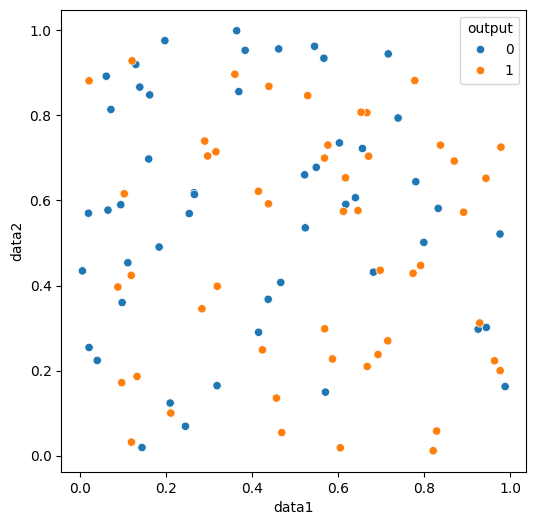

In [32]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="data1",y="data2",data=dataset,hue="output")
plt.show()

In [33]:
x=dataset.iloc[:,:-1]
y=dataset['output']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=31)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr=LogisticRegression()

In [38]:
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
lr.score(x_test,y_test)

0.7

In [40]:
from mlxtend.plotting import plot_decision_regions

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


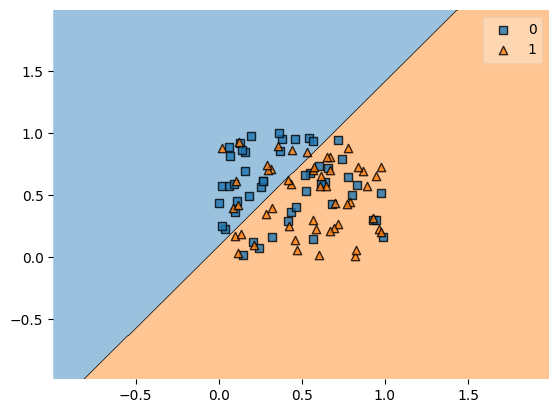

In [41]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
x=dataset.iloc[:,:-1]
y=dataset['output']

In [48]:
pf=PolynomialFeatures(degree=3)

In [49]:
pf.fit(x)

PolynomialFeatures(degree=3)

In [50]:
x1=pf.transform(x)

In [51]:
x1=pd.DataFrame(x1)

In [52]:
x1.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.548814,0.677817,0.301196,0.371995,0.459435,0.165301,0.204156,0.252144,0.311413
1,1.0,0.715189,0.270008,0.511496,0.193107,0.072904,0.365816,0.138108,0.052140,0.019685
2,1.0,0.602763,0.735194,0.363324,0.443148,0.540510,0.218998,0.267113,0.325800,0.397380
3,1.0,0.544883,0.962189,0.296898,0.524280,0.925807,0.161775,0.285672,0.504457,0.890801
4,1.0,0.423655,0.248753,0.179483,0.105385,0.061878,0.076039,0.044647,0.026215,0.015392


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=31)

In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)  # Increase max_iter
lr.fit(x_train, y_train)


LogisticRegression(max_iter=2000)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
from sklearn.pipeline import make_pipeline

In [57]:
scaler = StandardScaler()
lr = LogisticRegression(max_iter=2000, solver='saga')

pipeline = make_pipeline(scaler, lr)
pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=2000, solver='saga'))])

In [58]:
pipeline.score(x_test, y_test)

0.7